The classification of observations into groups requires some methods for computing
the distance or the (dis)similarity between each pair of observations. The result of
this computation is known as a dissimilarity or distance matrix.

* [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance)

* [Manhattan distance](http://artis.imag.fr/~Xavier.Decoret/resources/maths/manhattan/html/)

* [Pearson correlation distance](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

* [Eisen cosine correlation distance](https://en.wikipedia.org/wiki/Cosine_similarity)

* [Spearman correlation](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

* [Kendall correlation](https://en.wikipedia.org/wiki/Kendall_rank_correlation_coefficient)

# Distance matrix computation

In [1]:
set.seed(123)

In [2]:
ss = sample(1:50, 15) # Take 15 random rows

In [5]:
df = USArrests[ss, ]

In [6]:
df.scale = scale(df)

To compute Euclidean distance, you can use the R base dist() function, as follow:

In [7]:
dist.eucl = dist(df.scale, method = "euclidean")

In [8]:
dist.eucl

                  Iowa Rhode Island  Maryland Tennessee      Utah   Arizona
Rhode Island 2.7557930                                                     
Maryland     4.0885596    3.5743582                                        
Tennessee    3.3275375    3.6910831 1.5468531                              
Utah         2.3948043    1.9506810 2.9706730 2.7625656                    
Arizona      4.3066195    3.2821533 1.2558695 2.3641071 2.5306160          
Mississippi  3.9360579    4.4477713 2.4476788 1.9531252 4.2260379 3.6466475
Wisconsin    0.7020519    2.2135847 4.0368314 3.3665176 1.9897810 4.1087501
Virginia     2.1434429    2.5998851 2.0513004 1.3065227 1.7690823 2.4638737
Maine        0.7064899    2.9996750 4.2103160 3.5114430 2.9233689 4.5639875
Texas        3.6987718    2.8668715 1.6151724 1.6384074 2.1826658 1.6067554
Louisiana    3.8521181    3.4848278 1.2377930 1.1655217 3.1188595 2.1832427
Montana      1.2155510    2.9528869 3.0956064 2.2030264 2.2983159 3.5566655
Michigan    

In [9]:
# Reformat as a matrix
# Subset the first 3 columns and rows and Round the values
round(as.matrix(dist.eucl)[1:3, 1:3], 1)

,Iowa,Rhode Island,Maryland
Iowa,0.0,2.8,4.1
Rhode Island,2.8,0.0,3.6
Maryland,4.1,3.6,0.0


## Computing correlation based distances

In [10]:
library("factoextra")

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [12]:
dist.cor <- get_dist(df.scale, method = "pearson")

In [13]:
dist.cor

                   Iowa Rhode Island   Maryland  Tennessee       Utah
Rhode Island 0.39284182                                              
Maryland     1.88323808   1.48124956                                 
Tennessee    1.51104538   1.95724833 0.73275637                      
Utah         0.10172943   0.39649801 1.58735835 1.63796515           
Arizona      0.89643432   0.70873731 0.62996195 1.54924589 0.47335304
Mississippi  1.88828067   1.63047384 0.42964555 0.33013745 1.99902039
Wisconsin    0.03397220   0.22543935 1.88502852 1.65774350 0.15995476
Virginia     0.84488289   1.66338138 1.32301819 0.23171322 1.04250427
Maine        0.79373668   0.13229609 1.25215664 1.78623995 0.87221024
Texas        0.13294458   0.53490262 1.99943383 1.24466481 0.44007040
Louisiana    1.71026047   1.46307561 0.70139207 0.41080771 1.94546879
Montana      1.28105707   1.91441885 0.91474121 0.03590417 1.41264198
Michigan     1.10318723   1.65000415 0.65137671 0.52872771 0.85836307
Arkansas     1.93694

In [14]:
# Display a subset
round(as.matrix(dist.cor)[1:3, 1:3], 1)

,Iowa,Rhode Island,Maryland
Iowa,0.0,0.4,1.9
Rhode Island,0.4,0.0,1.5
Maryland,1.9,1.5,0.0


## Computing distances for mixed data

In [15]:
library(cluster)
# Load data
data(flower)
head(flower, 3)

V1,V2,V3,V4,V5,V6,V7,V8
0,1,1,4,3,15,25,15
1,0,0,2,1,3,150,50
0,1,0,3,3,1,150,50


In [16]:
# Data structure
str(flower)

'data.frame':	18 obs. of  8 variables:
 $ V1: Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 1 2 2 ...
 $ V2: Factor w/ 2 levels "0","1": 2 1 2 1 2 2 1 1 2 2 ...
 $ V3: Factor w/ 2 levels "0","1": 2 1 1 2 1 1 1 2 1 1 ...
 $ V4: Factor w/ 5 levels "1","2","3","4",..: 4 2 3 4 5 4 4 2 3 5 ...
 $ V5: Ord.factor w/ 3 levels "1"<"2"<"3": 3 1 3 2 2 3 3 2 1 2 ...
 $ V6: Ord.factor w/ 18 levels "1"<"2"<"3"<"4"<..: 15 3 1 16 2 12 13 7 4 14 ...
 $ V7: num  25 150 150 125 20 50 40 100 25 100 ...
 $ V8: num  15 50 50 50 15 40 20 15 15 60 ...


In [17]:
# Distance matrix
dd <- daisy(flower)
round(as.matrix(dd)[1:3, 1:3], 2)

,1,2,3
1,0.00,0.89,0.53
2,0.89,0.00,0.51
3,0.53,0.51,0.00


## Visualizing distance matrices

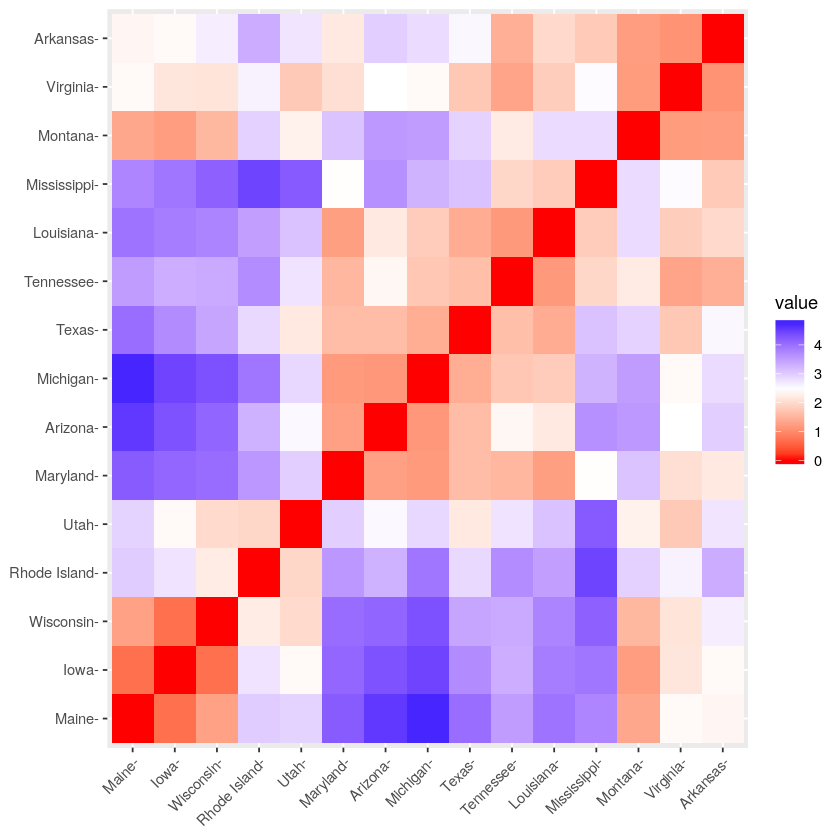

In [18]:
library(factoextra)
fviz_dist(dist.eucl)